In [17]:
import warnings
warnings.filterwarnings("ignore")

# Figure 1

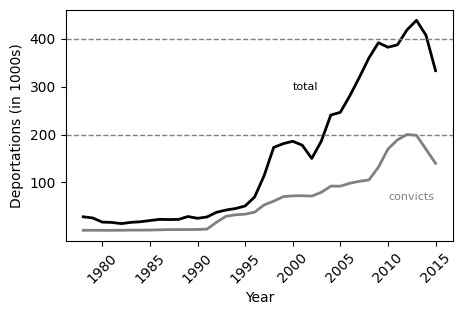

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

dep_tot = pd.read_csv(r"../dat/data_USdeporttotal.csv")

plt.figure(figsize=(5, 3))
plt.plot(dep_tot['YEAR'], dep_tot['TOTAL'], color='black', linewidth=2, label='Total')
plt.plot(dep_tot['YEAR'], dep_tot['CONVICT'], color='grey', linewidth=2, label='Convicts')

# y-axis
plt.yticks([100000, 200000, 300000, 400000], ['100', '200', '300', '400'])

# horizontal dotted lines
plt.axhline(y=200000, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=400000, color='grey', linestyle='--', linewidth=1)

# labels
plt.text(2000, 300000, 'total', fontsize=8, verticalalignment='center')
plt.text(2010, 70000, 'convicts', color='grey', fontsize=8, verticalalignment='center')

# plot
plt.ylabel('Deportations (in 1000s)')
plt.xlabel('Year')
plt.xticks(rotation=45)  

# export figure
# plt.savefig('../outputs/figure1.eps', format='eps')

# display plot
plt.show()


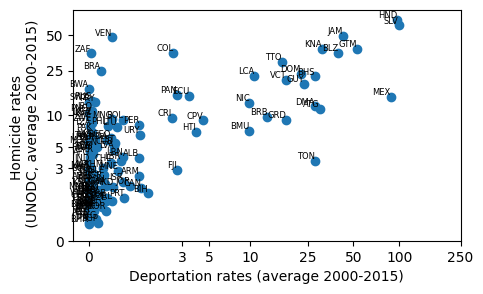

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

agg_mean_graph = pd.read_csv(r"../dat/data_figure2.csv")

# log-transformed variables
agg_mean_graph['plot_y'] = np.log(agg_mean_graph['homrates_pc_unodc_mn'] + 1)
agg_mean_graph['plot_x'] = np.log(agg_mean_graph['deport_convict_mn'] + 1)

# drop na values
PL = agg_mean_graph.dropna(subset=['plot_x', 'plot_y', 'iso3'])

# x and y axis values
y_values = np.array([0, 3, 5, 10, 25, 50])
x_values = np.array([0, 3, 5, 10, 25, 50, 100, 250])

# plot
plt.figure(figsize=(5, 3)) 
plt.scatter(PL['plot_x'], PL['plot_y'])
plt.ylabel('Homicide rates \n (UNODC, average 2000-2015)')
plt.xlabel('Deportation rates (average 2000-2015)')

# x and y axis labels
plt.yticks(np.log(y_values + 1), labels=y_values)
plt.xticks(np.log(x_values + 1), labels=x_values)

# add iso3 codes as labels for each dot
for i, txt in enumerate(PL['iso3']):
    plt.text(PL['plot_x'].iloc[i], PL['plot_y'].iloc[i], txt, fontsize=6, ha='right', va='bottom')

# export figure
# plt.savefig('../outputs/figure2.eps', format='eps')

# display
plt.show()

# Table 1

In [20]:
import pandas as pd
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare

data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y')  
data.set_index(['iso3', 'year'], inplace=True) 

# define control variables:
control_vars = " + war_intrastate + corruption + crime_US_weight + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

# (1) convicts'deportation rates, no controls, only country and year fixed effects
mod1 = PanelOLS.from_formula('homrates_unodc ~ deport_convict + EntityEffects + TimeEffects', data)
res1 = mod1.fit(cov_type='clustered', cluster_entity=True)

# (2) convicts'deportation rates, with time-varying controls and country fixed effects
mod2 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict + EntityEffects + TimeEffects {control_vars}', data)
res2 = mod2.fit(cov_type='clustered', cluster_entity=True)

# (3) change in convicts'deportation rates, with time-varying controls and country fixed effects
mod3 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + EntityEffects + TimeEffects {control_vars}', data)
res3 = mod3.fit(cov_type='clustered', cluster_entity=True)

# (4) change in convicts'deportation rates and change in non-convicts'deportation rate, with time-varying controls and country fixed effects
mod4 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + deport_nonconvict_d + EntityEffects + TimeEffects {control_vars}', data)
res4 = mod4.fit(cov_type='clustered', cluster_entity=True)

# (5) change in convicts'deportation rates and change in leading values of convicts'deportation rate, with time-varying controls and country fixed effects
mod5 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + deport_convict_lead + EntityEffects + TimeEffects {control_vars}', data)
res5 = mod5.fit(cov_type='clustered', cluster_entity=True)

# compare models
print(res1.summary)
print(res2.summary)
print(res3.summary)
print(res4.summary)
print(res5.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.1389
Estimator:                   PanelOLS   R-squared (Between):              0.2425
No. Observations:                 608   R-squared (Within):               0.1352
Date:                Sun, May 05 2024   R-squared (Overall):              0.2459
Time:                        11:30:07   Log-likelihood                   -1478.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      77.239
Entities:                         123   P-value                           0.0000
Avg Obs:                       4.9431   Distribution:                   F(1,479)
Min Obs:                       2.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             4.3084
                            

# Table 2

In [21]:
import pandas as pd
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare

data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year  
data.set_index(['iso3', 'year'], inplace=True) 

# subset to Latin American and the Caribbean region
data_LAC = data[data['region'] == "Latin America & Caribbean"]

# Define control variables
control_vars = "corruption + crime_US_weight + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

# (1) convicts'deportation rates, no controls, only country and year fixed effects
mod1 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict + EntityEffects + TimeEffects + {control_vars}', data_LAC)
res1 = mod1.fit(cov_type='clustered', cluster_entity=True)

# (2) convicts'deportation rates, with time-varying controls and country fixed effects
mod2 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + EntityEffects + TimeEffects + {control_vars}', data_LAC)
res2 = mod2.fit(cov_type='clustered', cluster_entity=True)

# Assuming 'homrates_who' is another dependent variable
# Define a reduced set of controls for WHO data analysis
reduced_controls = "corruption + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

# (3) for deportation rates in levels (WHO data)
mod3 = PanelOLS.from_formula(f'homrates_who ~ deport_convict + EntityEffects + TimeEffects + {reduced_controls}', data_LAC)
res3 = mod3.fit(cov_type='clustered', cluster_entity=True)

# (4) for changes in deportaotin rates (WHO data)
mod4 = PanelOLS.from_formula(f'homrates_who ~ deport_convict_d + EntityEffects + TimeEffects + {reduced_controls}', data_LAC)
res4 = mod4.fit(cov_type='clustered', cluster_entity=True)

# compare models
print(res1.summary)
print(res2.summary)
print(res3.summary)
print(res4.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.4567
Estimator:                   PanelOLS   R-squared (Between):             -703.68
No. Observations:                  99   R-squared (Within):               0.0823
Date:                Sun, May 05 2024   R-squared (Overall):             -670.79
Time:                        11:30:07   Log-likelihood                   -273.72
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.2736
Entities:                          21   P-value                           0.0001
Avg Obs:                       4.7143   Distribution:                   F(12,61)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             18.326
                            

# table 3

In [22]:
import pandas as pd
from linearmodels.iv import IV2SLS
from linearmodels.panel import PanelOLS

data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index(['iso3', 'year'], inplace=True)

# prepping datasets
data_2stp = data.dropna(subset=['homrates_unodc', 'instr_enforce_everify_lag1', 'instr_benef_medicaidpregn_lag1', 'deport_convict'])
data_LAC = data[data['region'] == "Latin America & Caribbean"]
data_LAC2stp = data_LAC.dropna(subset=['homrates_unodc', 'instr_enforce_everify_lag1', 'instr_benef_medicaidpregn_lag1', 'deport_convict'])

# define variables for 2sls
control_vars = "corruption + crime_US_weight + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

instruments = "instr_enforce_everify_lag1 + instr_benef_medicaidpregn_lag1"

endog = "deport_convict"

dependent = "homrates_unodc"

In [23]:
# (1) get 1st step tables for levels
mod1 = PanelOLS.from_formula(f'deport_convict ~ {instruments} + EntityEffects + TimeEffects + war_intrastate + {control_vars}', data_2stp)
res1 = mod1.fit(cov_type='robust')
print(res1.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         deport_convict   R-squared:                        0.4345
Estimator:                   PanelOLS   R-squared (Between):             -1562.8
No. Observations:                 399   R-squared (Within):               0.3110
Date:                Sun, May 05 2024   R-squared (Overall):             -1234.3
Time:                        11:30:07   Log-likelihood                   -1320.5
Cov. Estimator:                Robust                                           
                                        F-statistic:                      16.407
Entities:                          81   P-value                           0.0000
Avg Obs:                       4.9259   Distribution:                  F(14,299)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             2.7472
                            

In [24]:
# (3) the 2nd step results
data_2stp['deport_convict_hat'] = res1.predict()
mod2 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_hat + EntityEffects + TimeEffects + war_intrastate + {control_vars}', data_2stp)
res2 = mod2.fit(cov_type='robust')
print(res2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.1890
Estimator:                   PanelOLS   R-squared (Between):             -2.0397
No. Observations:                 399   R-squared (Within):              -0.9588
Date:                Sun, May 05 2024   R-squared (Overall):             -1.8350
Time:                        11:30:07   Log-likelihood                   -938.35
Cov. Estimator:                Robust                                           
                                        F-statistic:                      5.3763
Entities:                          81   P-value                           0.0000
Avg Obs:                       4.9259   Distribution:                  F(13,300)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             1.7978
                            

In [25]:
# (2) get 1st step tables for LAC
mod3 = PanelOLS.from_formula(f'deport_convict ~ {instruments} + EntityEffects + TimeEffects + {control_vars}', data_LAC2stp)
res3 = mod3.fit(cov_type='robust')
print(res3.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         deport_convict   R-squared:                        0.7958
Estimator:                   PanelOLS   R-squared (Between):             -4081.6
No. Observations:                  99   R-squared (Within):               0.0046
Date:                Sun, May 05 2024   R-squared (Overall):             -3100.0
Time:                        11:30:07   Log-likelihood                   -335.42
Cov. Estimator:                Robust                                           
                                        F-statistic:                      17.985
Entities:                          21   P-value                           0.0000
Avg Obs:                       4.7143   Distribution:                   F(13,60)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             13.734
                            

In [26]:
# (4) the 2nd step results for LAC
data_LAC2stp['deport_convict_hat'] = res3.predict()
mod4 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_hat + EntityEffects + TimeEffects + {control_vars}', data_LAC2stp)
res4 = mod4.fit(cov_type='robust')
print(res4.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.4161
Estimator:                   PanelOLS   R-squared (Between):             -11.979
No. Observations:                  99   R-squared (Within):              -2.0328
Date:                Sun, May 05 2024   R-squared (Overall):             -9.3646
Time:                        11:30:07   Log-likelihood                   -277.30
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3.6221
Entities:                          21   P-value                           0.0004
Avg Obs:                       4.7143   Distribution:                   F(12,61)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             3.5423
                            

# Sensitivity Analysis

In [27]:
import pandas as pd
from linearmodels.panel import PanelOLS

# Load your data
data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y')  
data.set_index(['iso3', 'year'], inplace=True)

# Base formula without control variables
base_formula = 'homrates_unodc ~ deport_convict + EntityEffects + TimeEffects'

# List of control variables to test
control_vars = ["war_intrastate", "corruption", "crime_US_weight", "GDP_growth", "pop_sh14", "GDPpercapita_const2010USD_log", "gini_mkt", "polity2", "population_log", "remittances_GDP", "yr_sch", "urban_interp"]

# Dictionary to hold the results
results_summary = {}

# Loop over each control variable and add it to the base model
for control in control_vars:
    # Create formula with the current control variable
    current_formula = f'{base_formula} + {control}'
    
    # Fit the model
    model = PanelOLS.from_formula(current_formula, data)
    results = model.fit(cov_type='clustered', cluster_entity=True)
    
    # Store the summary of the results
    results_summary[control] = results.summary
    
    # Optionally print the summary
    print(f"Model with {control} added:")
    print(results.summary)
    print("\n" + "="*50 + "\n")  # Print a separator for clarity

# After the loop, `results_summary` dictionary contains all the results for further analysis


Model with war_intrastate added:
                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.1389
Estimator:                   PanelOLS   R-squared (Between):              0.2424
No. Observations:                 608   R-squared (Within):               0.1354
Date:                Sun, May 05 2024   R-squared (Overall):              0.2459
Time:                        11:30:08   Log-likelihood                   -1478.0
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      38.554
Entities:                         123   P-value                           0.0000
Avg Obs:                       4.9431   Distribution:                   F(2,478)
Min Obs:                       2.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             2.

Sensitivity Analysis

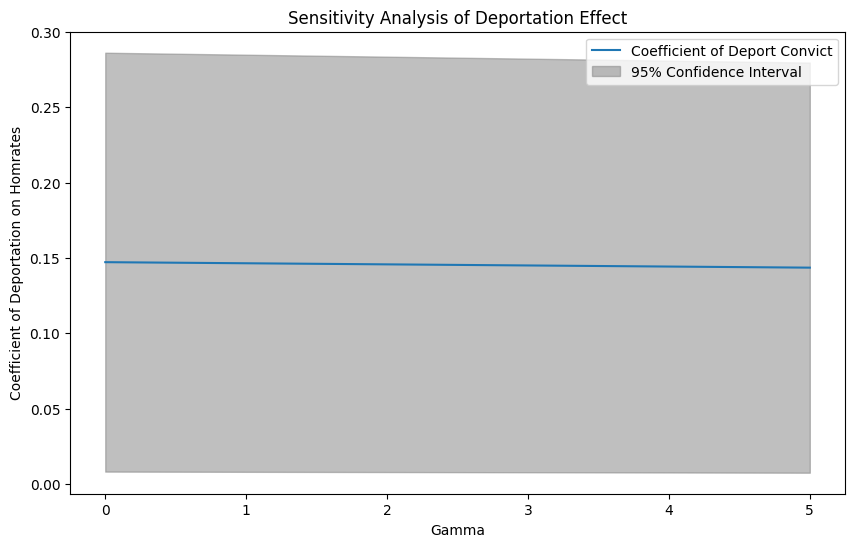

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS

# Load and prepare the data
data = pd.read_csv("../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index(['iso3', 'year'], inplace=True)

# Simulate the unobserved confounder effect
data['confounder_effect'] = np.random.normal(0, 0.1, size=data.shape[0])

# Range of gamma values
gamma_values = np.linspace(0, 5, 500)

# Store the original values of homrates_unodc
original_homrates = data['homrates_unodc'].copy()

# Results storage
coefficients = []
standard_errors = []

for gamma in gamma_values:
    # Adjust homrates_unodc for each gamma value
    data['homrates_unodc'] = original_homrates + gamma * data['confounder_effect']
    
    # Run the regression model
    mod = PanelOLS.from_formula('homrates_unodc ~ deport_convict + EntityEffects + TimeEffects', data)
    res = mod.fit(cov_type='clustered', cluster_entity=True)
    
    # Collect results
    coefficients.append(res.params['deport_convict'])
    standard_errors.append(res.std_errors['deport_convict'])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, coefficients, label='Coefficient of Deport Convict')
plt.fill_between(gamma_values, 
                 np.array(coefficients) - 1.96 * np.array(standard_errors), 
                 np.array(coefficients) + 1.96 * np.array(standard_errors), 
                 color='gray', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Gamma')
plt.ylabel('Coefficient of Deportation on Homrates')
plt.title('Sensitivity Analysis of Deportation Effect')
plt.legend()
plt.show()

# sensitivty analysis 2

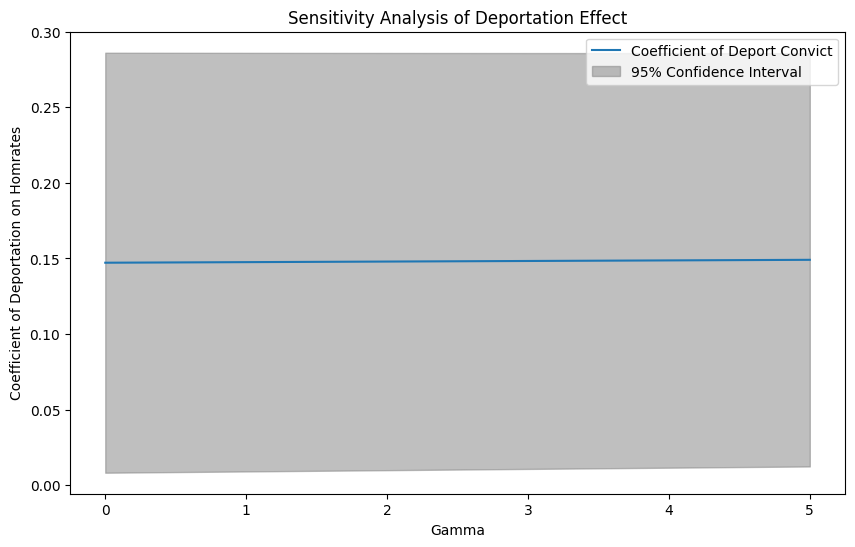

In [31]:
data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index(['iso3', 'year'], inplace=True)

# Define the base formula
data['confounder_effects'] = np.random.normal(0, 0.1, size=len(data))

# range of gamma values
gamma_values = np.linspace(0, 1, 100)

sensitivity_results = []

for gamma in gamma_values:
    # adjust the homrates_unodc for each gamma value
    data['homrates_unodc_with_confounder'] = data['homrates_unodc'] + gamma * data['confounder_effects']

    # run the regression model
    mod = PanelOLS.from_formula('homrates_unodc_with_confounder ~ deport_convict + EntityEffects + TimeEffects', data)
    res = mod.fit(cov_type='clustered', cluster_entity=True)

    # collect results
    sensitivity_results.append({
        'gamma': gamma,
        'coefficient': res.params['deport_convict'],
        'std_error': res.std_errors['deport_convict']
    })

# convert results to a DataFrame
sensitivity_results_df = pd.DataFrame(sensitivity_results)

# plot the results
plt.figure(figsize=(10, 6))
plt.plot(sensitivity_results_df['gamma'], sensitivity_results_df['coefficient'], label='Coefficient of Deport Convict')
plt.fill_between(sensitivity_results_df['gamma'],
                 sensitivity_results_df['coefficient'] - 1.96 * sensitivity_results_df['std_error'],
                 sensitivity_results_df['coefficient'] + 1.96 * sensitivity_results_df['std_error'],
                 color='gray', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Gamma')
plt.ylabel('Coefficient of Deportation on Homrates')
plt.title('Sensitivity Analysis of Deportation Effect')
plt.legend()
plt.show()

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

def simulate_unobserved_confounding(n, gamma):
    # Simulate unobserved confounder as a normal random variable
    U = norm.rvs(size=n)
    return U * gamma

def estimate_treatment_effect(data, U):
    X = data[control_vars]
    treatment_effect_model = LinearRegression()
    # Adjust treatment by adding the unobserved confounder effect
    adjusted_treatment = data['deport_convict'] + U
    # Fit model with adjusted treatment and control variables
    treatment_effect_model.fit(X.assign(treatment=adjusted_treatment), data['homrates_unodc'])
    # The coefficient of the adjusted treatment variable
    return treatment_effect_model.coef_[-1]  # Assuming 'treatment' is the last column after `assign`

def sensitivity_analysis(data, gamma_values, iterations=100):
    results = []
    n = len(data)
    for gamma in gamma_values:
        effects = []
        for _ in range(iterations):
            U = simulate_unobserved_confounding(n, gamma)
            effect = estimate_treatment_effect(data, U)
            effects.append(effect)
        mean_effect = np.mean(effects)
        std_effect = np.std(effects)
        results.append((gamma, mean_effect, std_effect))
        print(f"Gamma: {gamma}, Mean Effect: {mean_effect}, Std Dev: {std_effect}")
    return results

gamma_values = np.linspace(0, 2, 21)
results = sensitivity_analysis(data, gamma_values)
results_df = pd.DataFrame(results, columns=['Gamma', 'Mean Effect', 'Std Dev'])
print(results_df)


Gamma: 0.0, Mean Effect: 0.39726455432453256, Std Dev: 1.1102230246251565e-16
Gamma: 0.1, Mean Effect: 0.39725456882491317, Std Dev: 0.000139633651288334
Gamma: 0.2, Mean Effect: 0.3972305370160102, Std Dev: 0.00029996698197935415
Gamma: 0.30000000000000004, Mean Effect: 0.3971027597074994, Std Dev: 0.0004239248901461867
Gamma: 0.4, Mean Effect: 0.39707336832415024, Std Dev: 0.0005847760181400783
Gamma: 0.5, Mean Effect: 0.3969579151241463, Std Dev: 0.0007555049061866257
Gamma: 0.6000000000000001, Mean Effect: 0.3968265826853195, Std Dev: 0.0008902695780690122
Gamma: 0.7000000000000001, Mean Effect: 0.3966991951790131, Std Dev: 0.0010410445282695024
Gamma: 0.8, Mean Effect: 0.3965373766879977, Std Dev: 0.0011091677022863073
Gamma: 0.9, Mean Effect: 0.39615283772481236, Std Dev: 0.0013748686348346428
Gamma: 1.0, Mean Effect: 0.3960049886212581, Std Dev: 0.001312391829425746
Gamma: 1.1, Mean Effect: 0.3957227954820428, Std Dev: 0.0016532773405675003
Gamma: 1.2000000000000002, Mean Effect